In [40]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from mpl_toolkits.mplot3d import axes3d

In [41]:
# Espesos elastico
h = 50e-3
# Modulo Young
E = 69e9
# Razón de poisson
nu = 0.35

# Flexural rigidity
D = h**3 * E / (12*(1-nu**2))
print(D)

819088.3190883192


In [57]:
a = 1.
b = 1.
N = 101

# Carga
P = -10e3
# Posicion de la carga
xi = a / 2
eta = b / 2

x = np.linspace(0,a,num=N)
y = np.linspace(0,b,num=N)

In [58]:
#Series
max_m = 16
max_n = 16

$$ \frac{\partial^{4} w}{\partial x^{4}} + 2\frac{\partial^{4} w}{\partial x^{2} \partial y^{2}} + \frac{\partial^{4} w}{\partial y^{4}} = \frac{q(x,y)}{D}$$

$$  w(x,y) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} \frac{a_{mn}}{\pi^{4}D} (\frac{m^{2}}{a^{2}} + \frac{n^{2}}{b^{2}} )^{2}  sin (\frac{m\pi x}{a}) sin (\frac{n\pi y}{b})  $$

donde,

$$a_{mn} =  \frac{4P}{ab} sin(\frac{m\pi \xi}{a}) sin(\frac{n\pi \eta}{b}) $$ 

In [59]:
# Calculo de las sumas

In [60]:
@nb.njit
def getamn(P,a,b,xi,eta,m,n):
    return 4* P * np.sin( m * np.pi * xi / a ) * np.sin( n * np.pi * eta / b )/(a*b) 

In [61]:
@nb.njit
def Deformacion(x,y,w,a,b,P,xi,eta,D,max_m,max_n):
    
    M,N = w.shape
    
    for m in range(1,max_m):
        for n in range(1,max_n):
            
            for i in range(M):
                for j in range(N):
                    amn = getamn(P,a,b,xi,eta,m,n)
                    w[i,j] += amn / \
                    (  (m/a)**2 + (n/b)**2 )**2 * \
                    np.sin( m*np.pi*x[i,j]/a ) * np.sin( n*np.pi*y[i,j]/b ) / \
                    (np.pi**4 * D)

In [62]:
xx,yy = np.meshgrid(x,y)

w = np.zeros_like(xx)

In [63]:
%timeit Deformacion(xx,yy,w,a,b,P,xi,eta,D,max_m,max_n)

171 ms ± 7.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
w1 = np.zeros_like(xx)

%timeit Deformacion(xx,yy,w1,a,b,P,0.8,0.2,D,max_m,max_n)

164 ms ± 5.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
w += w1

<IPython.core.display.Javascript object>


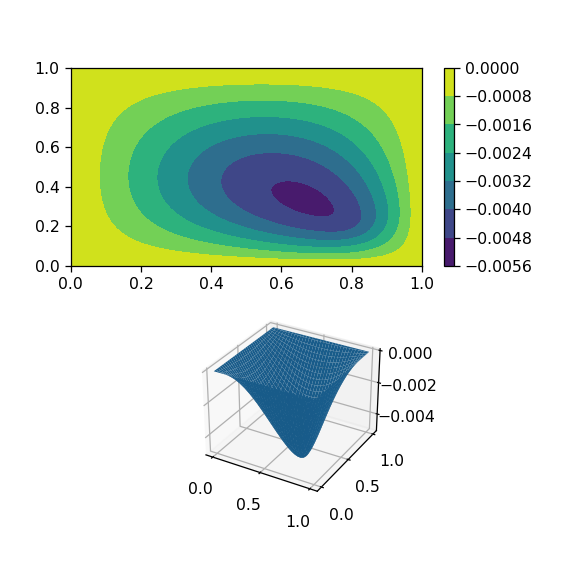

In [67]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, projection='3d')

c = ax1.contourf(xx,yy,w)
fig.colorbar(c, ax = ax1)

ax2.plot_surface(xx,yy,w)